In [18]:
import pandas as pd
import duckdb
import matplotlib.pyplot as plt
import seaborn as sns

In [19]:
users_subscriptions = pd.read_csv('../files/users_subscriptions.csv', encoding='utf-8', sep=';')

# How long does it takes for users to complete the basics?

In [29]:
qry = """
    SELECT
        AVG(basics_activity_duration_minutes) AS avg_activity_duration_minutes
    FROM
        users_subscriptions
    WHERE
        basics_completed = True
"""

res = duckdb.query(qry).df()
value = res['avg_activity_duration_minutes'].squeeze()
print(f"In average, users takes {round(value,2)} minutes to complete their basics.")

In average, users takes 59.99 minutes to complete their basics.


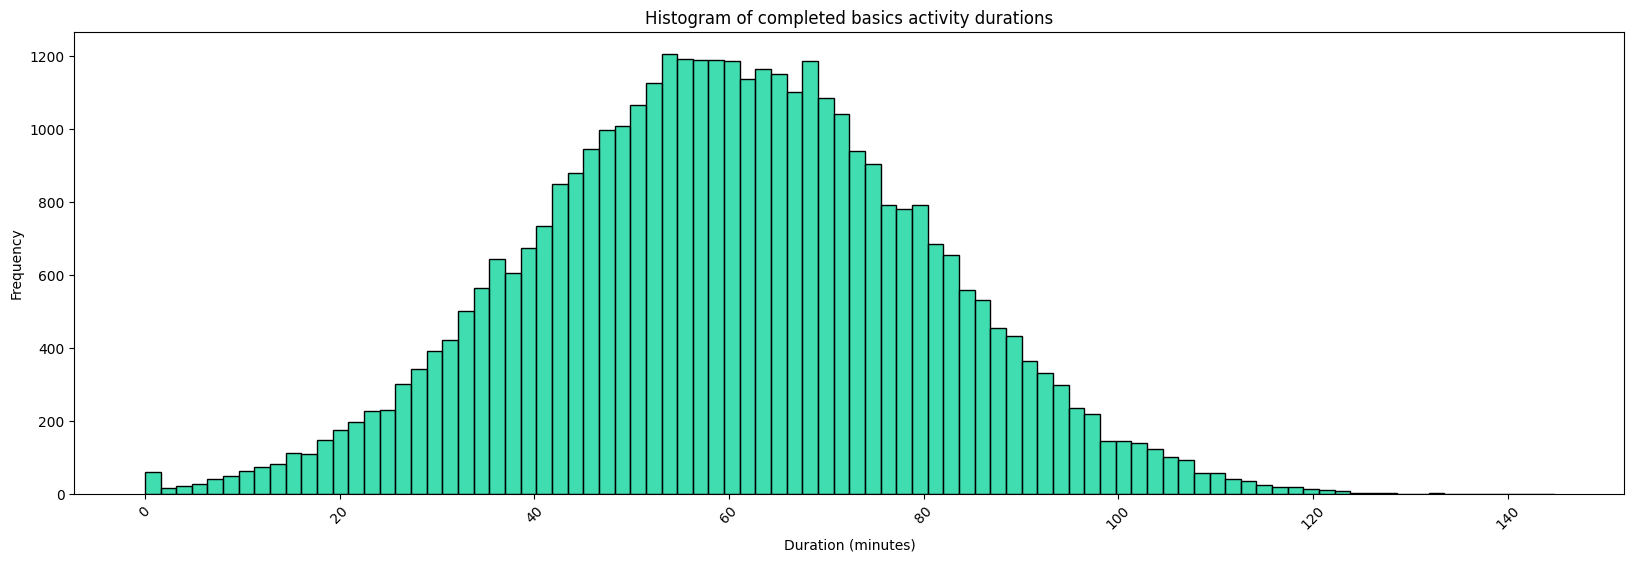

In [25]:
qry = """
    SELECT
        user_id
        , basics_activity_duration_minutes
    FROM
        users_subscriptions
    WHERE
        basics_completed = True
"""

completed_durations = duckdb.query(qry).df()


plt.figure(figsize=(20,6))
sns.histplot(completed_durations['basics_activity_duration_minutes'], color='#00D296')

plt.title('Histogram of completed basics activity durations')
plt.xlabel('Duration (minutes)')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

# Final Answer:
As we have seen, to complete their basics the users take, on average, 59.99 minutes.